In [110]:
import os
import pandas as pd 
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
import plotly.graph_objs as go

In [111]:
data = pd.read_csv('activities.csv')

In [112]:
#rows and columns returns (rows, columns)
data.shape

(1754, 78)

In [113]:
data.describe()

,Activity ID,Elapsed Time,Relative Effort,Athlete Weight,Bike Weight,Elapsed Time.1,Moving Time,Distance.1,Max Speed,Average Speed,...,Precipitation Probability,Precipitation Type,Cloud Cover,Weather Visibility,UV Index,Weather Ozone,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.avg_flow,translation missing: en-US.lib.export.portability_exporter.activities.horton_values.flagged
count,1.754000e+03,1754.000000,1340.000000,1482.000000,1411.000000,1702.000000,1754.000000,1752.000000,1733.000000,445.000000,...,143.000000,24.000000,143.000000,143.000000,143.000000,143.000000,0.0,0.0,0.0,0.0
mean,1.881519e+09,7075.094641,72.750000,76.784076,9.421262,7114.154524,4652.318700,31041.657059,13.254310,7.519571,...,0.046224,5.041667,0.347483,15925.461538,1.510490,308.010489,NaN,NaN,NaN,NaN
std,1.270237e+09,26308.285192,61.815399,1.339904,0.951401,26693.692143,3740.737525,29231.915272,5.288814,2.793170,...,0.180484,0.204124,0.321413,752.229520,1.890924,25.407193,NaN,NaN,NaN,NaN
min,6.977701e+07,1.000000,0.000000,75.000000,7.800000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.000000,10725.000000,0.000000,264.399994,NaN,NaN,NaN,NaN
25%,8.557025e+08,2731.500000,29.000000,75.000000,9.000000,2713.250000,2371.250000,9652.875000,9.600000,6.140672,...,0.000000,5.000000,0.090000,16093.000000,0.000000,289.399994,NaN,NaN,NaN,NaN
50%,1.606012e+09,3981.500000,58.000000,77.000000,9.600000,4015.500000,3613.000000,22666.899414,13.600000,7.967563,...,0.000000,5.000000,0.240000,16093.000000,1.000000,305.899994,NaN,NaN,NaN,NaN
75%,2.888721e+09,7675.000000,98.250000,78.000000,9.600000,7675.000000,5781.250000,42432.399414,16.700001,9.222000,...,0.000000,5.000000,0.610000,16093.000000,2.000000,320.350006,NaN,NaN,NaN,NaN
max,4.561643e+09,801200.000000,486.000000,78.000000,15.000000,801200.000000,29876.000000,183909.500000,36.400002,12.503000,...,1.000000,6.000000,1.000000,16093.000000,9.000000,401.299988,NaN,NaN,NaN,NaN


In [114]:
data.isnull().any()

Activity ID                                                                                       False
Activity Date                                                                                     False
Activity Name                                                                                     False
Activity Type                                                                                     False
Activity Description                                                                               True
                                                                                                  ...  
Weather Ozone                                                                                      True
translation missing: en-US.lib.export.portability_exporter.activities.horton_values.jump_count     True
translation missing: en-US.lib.export.portability_exporter.activities.horton_values.total_grit     True
translation missing: en-US.lib.export.portability_exporter.activ

In [115]:
#basic information on all columns 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 78 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1754 non-null   int64  
 1   Activity Date                                                                                   1754 non-null   object 
 2   Activity Name                                                                                   1754 non-null   object 
 3   Activity Type                                                                                   1754 non-null   object 
 4   Activity Description                                                                            188 non-null    object 
 5   Elapsed Time 

Lets creat a new dataframe with on the columns we would need for the next stage

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754 entries, 0 to 1753
Data columns (total 78 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Activity ID                                                                                     1754 non-null   int64  
 1   Activity Date                                                                                   1754 non-null   object 
 2   Activity Name                                                                                   1754 non-null   object 
 3   Activity Type                                                                                   1754 non-null   object 
 4   Activity Description                                                                            188 non-null    object 
 5   Elapsed Time 

In [117]:
#lets pick the columns from data and paste them into a new dataframe
data_strava = data[['Activity ID','Distance','Activity Date','Moving Time','Relative Effort','Activity Name','Activity Type','Elapsed Time','Elevation Gain','Max Speed','Calories','Average Cadence','Average Heart Rate','Max Heart Rate','Average Watts','Athlete Weight','Average Temperature']]




In [118]:
#lets rename the columns and delete the space and keep the activity names in lowercases.
#df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
data_strava = data_strava.rename(columns={'Activity ID':'activity_id'})
data_strava = data_strava.rename(columns={'Activity Date':'activity_data'})
data_strava = data_strava.rename(columns={'Moving Time':'moving_time'})
data_strava = data_strava.rename(columns={'Relative Effort':'relative_effort'})
data_strava = data_strava.rename(columns={'Activity Name':'activity_name'})
data_strava = data_strava.rename(columns={'Activity Type':'activity_type'})
data_strava = data_strava.rename(columns={'Elapsed Time':'elapsed_time'})
data_strava = data_strava.rename(columns={'Elevation Gain':'elevation_gain'})
data_strava = data_strava.rename(columns={'Calories':'calories'})
data_strava = data_strava.rename(columns={'Average Cadence':'avg_cadence'})
data_strava = data_strava.rename(columns={'Average Heart Rate':'avg_hr'})
data_strava = data_strava.rename(columns={'Average Watts':'avg_power'})
data_strava = data_strava.rename(columns={'Athlete Weight':'weight'})
data_strava = data_strava.rename(columns={'Average Temperature':'temperature'})
data_strava = data_strava.rename(columns={'Max Heart Rate':'max_hr'})
data_strava = data_strava.rename(columns={'Max Speed':'max_speed'})
data_strava = data_strava.rename(columns={'Distance':'distance'})
data_strava = data_strava[data_strava.activity_type != "Swim"]

In [140]:
#lets have a look at all the data
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0,2013-07-27


In [120]:
data_strava['activity_type'].value_counts()

Ride            994
Virtual Ride    419
Run             284
Hike             24
Workout           6
Nordic Ski        4
E-Bike Ride       3
Alpine Ski        1
Yoga              1
Kayaking          1
Snowshoe          1
Name: activity_type, dtype: int64

In [127]:
#shows for each column the percentage of null values 
data_strava.isnull().sum() / data_strava.shape[0]

activity_id        0.000000
distance           0.000000
activity_data      0.000000
moving_time        0.000000
relative_effort    0.229574
activity_name      0.000000
activity_type      0.000000
elapsed_time       0.000000
elevation_gain     0.034522
max_speed          0.012083
calories           0.330840
avg_cadence        0.437284
avg_hr             0.253740
max_hr             0.363061
avg_power          0.202532
weight             0.151323
temperature        0.753165
dtype: float64

In [128]:
#Separate date column into Date and Time
new = data_strava["activity_data"].str.split(",", n = 1, expand = True) 
data_strava["date"]= new[0] 
data_strava["year"]= new[1] 
new = data_strava["date"].str.split(" ", n = 1, expand = True) 
data_strava["month"]= new[0] 
data_strava["day"]= new[1] 
new = data_strava["year"].str.split(",", n = 1, expand = True) 
data_strava["year"]= new[0] 
data_strava["time"]= new[1]
#dropping the column date
#data_strava = data_strava.drop(['date'], axis=1)

In [129]:
#Lets round all the columns
data_strava = data_strava.round(0)

In [130]:
#Convert elapsed_time from seconds to minutes and hours
#data_strava['elapsed_time'] = pd.to_datetime(data_strava.elapsed_time, unit='s').dt.strftime('%H:%M')
#data_strava['moving_time'] = pd.to_datetime(data_strava.moving_time, unit='s').dt.strftime('%H:%M')

In [131]:
data_strava["distance"].apply(lambda x: float(x))

0        32.27
1        38.00
2        91.00
3        82.00
4        69.23
         ...  
1749     26.05
1750      7.98
1751    105.68
1752      0.00
1753      8.66
Name: distance, Length: 1738, dtype: float64

In [132]:
#Lets add one column for 1 row = 1
data_strava["activity_count"]=1

In [142]:
data_strava.head(2)

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26


In [134]:
#This code will change activity data column into datetime object and then will store the date into a new column
#data_strava['activity_data'] = data_strava['activity_data'].apply(pd.to_numeric, errors='coerce')
data_strava['activity_data'] = pd.to_datetime(data_strava['activity_data'])
data_strava['dates'] = data_strava['activity_data'].dt.date


In [75]:
data_strava.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1738 entries, 0 to 1753
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   activity_id      1738 non-null   int64         
 1   distance         1738 non-null   object        
 2   activity_data    1738 non-null   datetime64[ns]
 3   moving_time      1738 non-null   float64       
 4   relative_effort  1339 non-null   float64       
 5   activity_name    1738 non-null   object        
 6   activity_type    1738 non-null   object        
 7   elapsed_time     1738 non-null   int64         
 8   elevation_gain   1678 non-null   float64       
 9   max_speed        1717 non-null   float64       
 10  calories         1163 non-null   float64       
 11  avg_cadence      978 non-null    float64       
 12  avg_hr           1297 non-null   float64       
 13  max_hr           1107 non-null   float64       
 14  avg_power        1386 non-null   float64

In [76]:
data_strava.to_csv('data_out.csv')

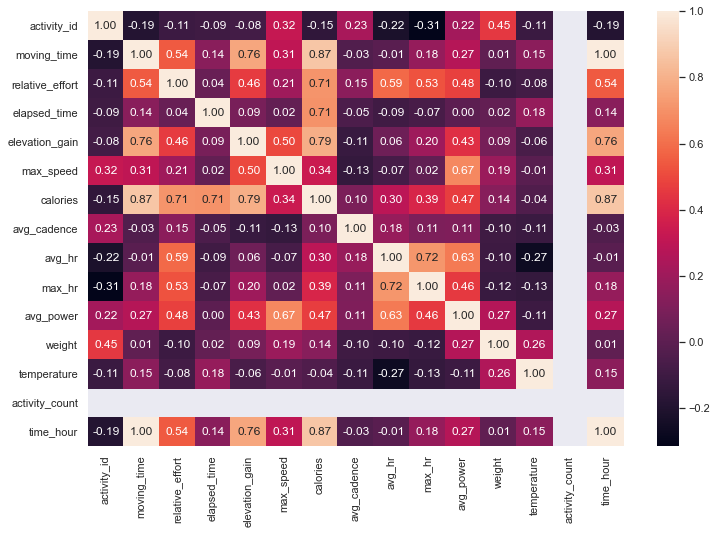

In [77]:
corr = data_strava.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [143]:
import plotly.express as px
fig = px.pie(data_strava, values='activity_count', names='activity_type')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Activity Type')
fig.show()

In [79]:
fig = px.pie(data_strava, values='activity_count', names='activity_type')
fig.update_traces(textposition='inside', textinfo='percent+label',title='Frequency of Activity Type')
fig.show()

In [80]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0,2013-07-27


convert data to be able to create a radar plot 

In [81]:
df =  data_strava.groupby("year").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['year'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [82]:
df =  data_strava.groupby("dates").sum()
df.reset_index(inplace=True)

fig = go.Figure([
    go.Scatter(
        name='activity_count',
        x=df['dates'],
        y=df['activity_count'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    )
])
fig.update_layout(
    yaxis_title='Number of activity',
    title='Number of activity per year',
    xaxis_title = 'Time(Days)',
    hovermode="x"
)

fig.update_xaxes(rangeslider_visible=True)

fig.show()

In [83]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_hr")
fig.show()

In [84]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="temperature")
fig.show()

In [85]:
#Plot heart rate 
fig = px.box(data_strava, x="year",y="avg_power")
fig.show()

In [86]:
#Plot relative effort
fig = px.box(data_strava, x="month",y="relative_effort")
fig.show()

In [87]:
fig = px.bar(data_strava, x="year", y="activity_count", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","orange","lime","teal","gold","olive","cyan","white","black","brown","purple", "green", "blue", "yellow","goldenrod", "magenta"],
)
fig.show()

In [88]:
data_strava.head()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
0,69777014,32.27,2013-07-25 16:28:48,6316.0,NaN,Sortie du jeudi soir ( afterwork ) VTT,Ride,9406,779.0,16.0,...,78.0,NaN,Jul 25,2013,Jul,25,4:28:48 PM,1,22737600.0,2013-07-25
1,69924640,38.00,2013-07-26 06:26:32,5257.0,NaN,"07/26/2013 Monswiller, Alsace, France",Ride,5284,928.0,16.0,...,78.0,NaN,Jul 26,2013,Jul,26,6:26:32 AM,1,18925200.0,2013-07-26
2,70016289,91.00,2013-07-23 08:00:00,11760.0,NaN,Ride !,Ride,11760,NaN,NaN,...,78.0,NaN,Jul 23,2013,Jul,23,8:00:00 AM,1,42336000.0,2013-07-23
3,70016552,82.00,2013-07-22 06:00:00,10800.0,NaN,Ride !,Ride,10800,NaN,NaN,...,78.0,NaN,Jul 22,2013,Jul,22,6:00:00 AM,1,38880000.0,2013-07-22
4,70105275,69.23,2013-07-27 05:54:10,9025.0,NaN,"07/27/2013 Monswiller, Alsace, France",Ride,10384,1356.0,24.0,...,78.0,NaN,Jul 27,2013,Jul,27,5:54:10 AM,1,32490000.0,2013-07-27


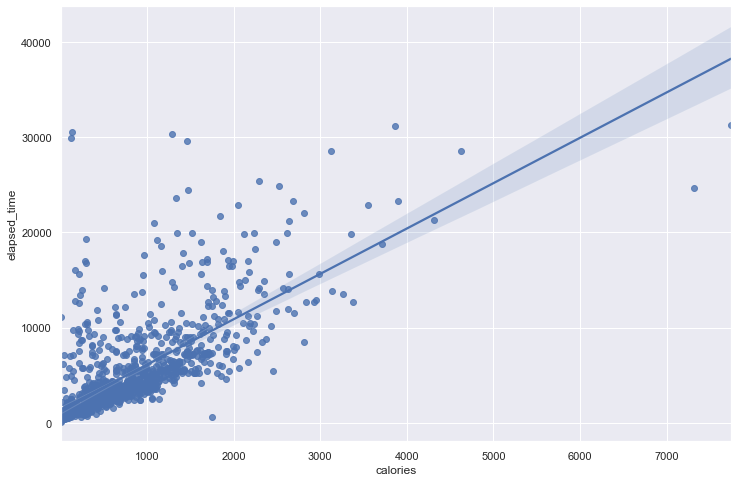

In [89]:
#test of a non legit regression
plt.figure(figsize=(12, 8))
sns.regplot(x='calories', y='elapsed_time', data=data_strava);
#plt.title('Temperature vs. Elevation Gain');
#plt.xlabel("Calories")
#plt.ylabel("Elevation")

In [90]:
data_run = data_strava[data_strava.activity_type == 'Run']
data_ride = data_strava[data_strava.activity_type == 'Ride']

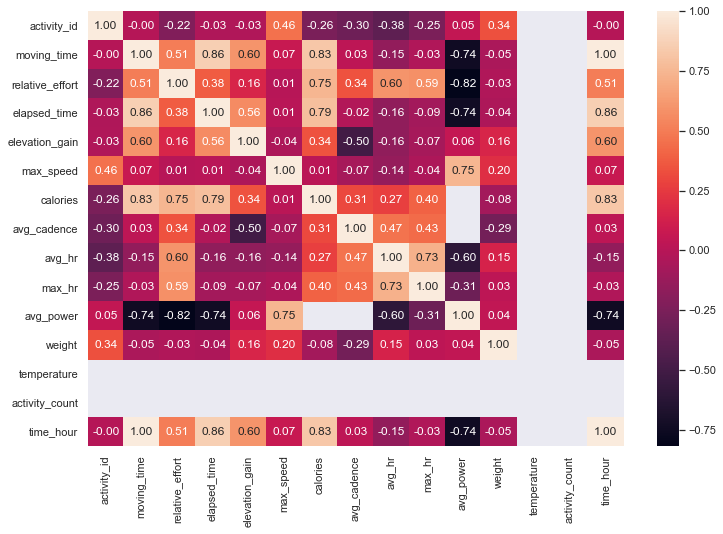

In [91]:
corr = data_run.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

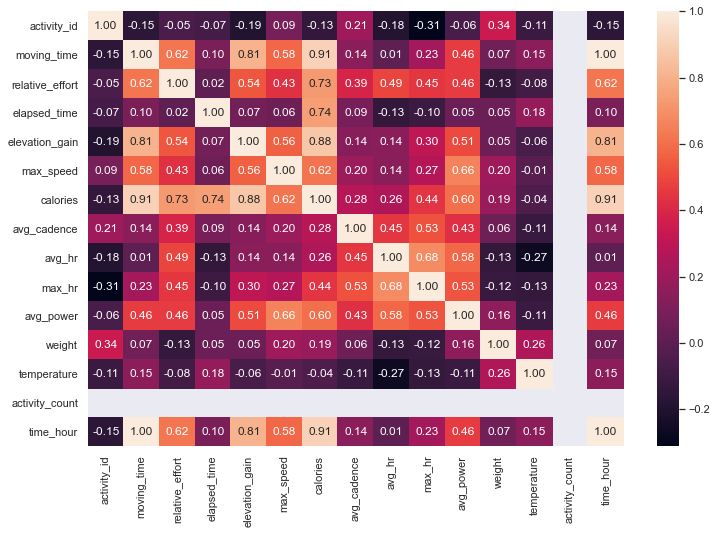

In [92]:
corr = data_ride.corr()
plt.figure(figsize = (12,8))
sns.heatmap(corr, annot=True, fmt=".2f");

In [93]:
data_ride.tail()

,activity_id,distance,activity_data,moving_time,relative_effort,activity_name,activity_type,elapsed_time,elevation_gain,max_speed,...,weight,temperature,date,year,month,day,time,activity_count,time_hour,dates
1680,4284331757,15.46,2020-11-04 10:13:34,3739.0,79.0,Tour De KOMfinement - Étape 6,Ride,3928,462.0,13.0,...,NaN,8.0,Nov 4,2020,Nov,4,10:13:34 AM,1,13460400.0,2020-11-04
1681,4289585171,13.81,2020-11-05 12:47:53,3615.0,83.0,Tour De KOMfinement - Étape 7,Ride,3934,396.0,13.0,...,NaN,9.0,Nov 5,2020,Nov,5,12:47:53 PM,1,13014000.0,2020-11-05
1682,4296860071,17.75,2020-11-06 12:37:50,3644.0,81.0,Tour De KOMfinement - Étape 8,Ride,4141,485.0,15.0,...,NaN,7.0,Nov 6,2020,Nov,6,12:37:50 PM,1,13118400.0,2020-11-06
1683,4302671675,27.25,2020-11-07 14:29:30,3644.0,46.0,Tour De KOMfinement - Étape 9,Ride,3735,458.0,17.0,...,NaN,4.0,Nov 7,2020,Nov,7,2:29:30 PM,1,13118400.0,2020-11-07
1736,4513993799,8.98,2020-12-24 20:04:22,1941.0,NaN,Secret santa - Festive 9/500,Ride,2470,28.0,10.0,...,NaN,NaN,Dec 24,2020,Dec,24,8:04:22 PM,1,6987600.0,2020-12-24


In [94]:
import plotly.express as px

fig = px.histogram(data_ride, x="distance", nbins=60)
fig.update_layout(
    yaxis_title='Count',
    #title='Frequence of ',
    xaxis_title = 'Distance(km)',
    hovermode="x"
)


fig.show()


In [95]:
fig = px.histogram(data_run, x="distance", nbins=60)
fig.show()

In [96]:
fig = px.scatter(data_strava, x="moving_time", y="distance",color="activity_type")
fig.show()

In [97]:
fig = px.scatter(data_strava, x="moving_time", y="distance",color="year")
fig.show()

In [98]:
fig = px.scatter(data_strava, x="moving_time", y="avg_hr",color="year")
fig.show()

In [99]:
data_ride.to_csv('data_out_ride.csv')

Source: https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

In [100]:
data_ride['month'].value_counts()
data_ride.groupby(['month']).groups.keys()


dict_keys(['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'])

In [101]:
data_strava.groupby(['month', 'activity_type'])['date'].count()


month  activity_type
Apr    E-Bike Ride        2
       Hike               1
       Nordic Ski         1
       Ride              71
       Run               22
       Snowshoe           1
       Virtual Ride      51
Aug    Hike               3
       Ride             128
       Run               27
       Virtual Ride      16
       Workout            1
Dec    Hike               2
       Ride              49
       Run               19
       Virtual Ride      71
Feb    Alpine Ski         1
       Nordic Ski         2
       Ride              34
       Run               23
       Virtual Ride      41
Jan    Hike               2
       Nordic Ski         1
       Ride              22
       Run               17
       Virtual Ride      46
       Yoga               1
Jul    Hike               1
       Ride             166
       Run               12
       Virtual Ride      15
Jun    Hike               4
       Kayaking           1
       Ride             120
       Run               23

In [102]:
# Group the data frame by month and item and extract a number of stats from each group
summary = data_strava.groupby(
    ['month', 'activity_type']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'elapsed_time': [min, max, sum],
        # find the number of network type entries
        'activity_type': "count",
        # minimum, first, and number of unique dates
        #'date': [min, 'first', 'nunique']
    }
)

In [103]:
print(summary)

                    elapsed_time                  activity_type
                             min     max      sum         count
month activity_type                                            
Apr   E-Bike Ride            990    2015     3005             2
      Hike                 24468   24468    24468             1
      Nordic Ski           88150   88150    88150             1
      Ride                    22   20084   558942            71
      Run                    852    5483    77276            22
      Snowshoe              6134    6134     6134             1
      Virtual Ride           161    9227   172902            51
Aug   Hike                  5658   17818    34933             3
      Ride                   676   31254  1127903           128
      Run                   1205   17053   112190            27
      Virtual Ride          2494   14136    67156            16
      Workout               1393    1393     1393             1
Dec   Hike                  5718   19212

In [104]:
data1 = data_strava.groupby(
    ['year','activity_type']
).agg(
    {

        # find the number of network type entries
        'activity_type': "count",
        'moving_time' : "sum"
    }
)
print(data1)

                     activity_type  moving_time
year  activity_type                            
 2013 Ride                      38     368326.0
      Run                        3      12036.0
 2014 Nordic Ski                 1       5359.0
      Ride                      38     328035.0
      Run                       24      74695.0
      Snowshoe                   1       1168.0
      Workout                    1        696.0
 2015 Hike                       3      22614.0
      Ride                     130     976545.0
      Run                       34     129497.0
 2016 Hike                       9      78948.0
      Nordic Ski                 1       3937.0
      Ride                      98     575559.0
      Run                       50     160456.0
 2017 E-Bike Ride                3       3575.0
      Hike                       3      13339.0
      Ride                     283    1110550.0
      Run                       53     169429.0
      Virtual Ride              12      

In [105]:
data1.to_csv('data2.csv')

In [106]:
data1 = pd.read_csv('data2.csv')

In [135]:
fig = px.bar(data1, x="year", y="moving_time", color="activity_type", title="Number of Activities per Year",
                         color_discrete_sequence=["red","blue","yellow","teal","gold","olive","cyan","orange","brown","purple", "green", "blue", "yellow","goldenrod", "magenta"],
)
fig.show()